In [1]:
import pandas as pd
from ixplore import IXPLORE

In [2]:
# Load reaction data (users × items matrix, values in {0, 1})
reactions = pd.read_csv('../data/likert_reactions.csv', index_col=0)

# Initialize and fit the model
model = IXPLORE(reactions, pca_initialization=True)

# Get user embeddings
embedding  = model.get_embedding()        # User positions (N × 2)
parameters = model.get_item_parameters()  # Item parameters (K × 3)

# Embed a new user based on their answers
new_user_answers = pd.Series({'Q1': 0.8, 'Q2': 0.2, 'Q3': 0.6}, name='new_user')
position = model.embed_new_user(new_user_answers)

# Predict all answers for a user
predicted = model.predict_all_answers(new_user_answers)

2026-02-21 23:39:49,387 - ixplore - INFO - Number of users for model: 250
2026-02-21 23:39:49,388 - ixplore - INFO - Number of items: 40
2026-02-21 23:39:49,388 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-21 23:39:49,389 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-21 23:39:49,392 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-21 23:39:49,393 - ixplore - INFO - Random state set to 0
2026-02-21 23:39:49,396 - ixplore - INFO - Initialized embedding with PCA.
2026-02-21 23:39:49,476 - ixplore - INFO - Fitted model parameters from embedding.


In [3]:
import numpy as np

model = IXPLORE(
    reactions,
    prior_mean=np.array([0, 0]),                # Prior center
    prior_cov=np.array([[0.1, 0], [0, 0.1]]),   # Prior covariance
    sampling_resolution=200,                    # Grid resolution for posteriors
    xlimits=(-1, 1),                            # X-axis bounds
    ylimits=(-1, 1),                            # Y-axis bounds
    pca_initialization=True,                    # Initialize with PCA
    random_state=17                             # For reproducibility
)

2026-02-21 23:39:52,883 - ixplore - INFO - Number of users for model: 250
2026-02-21 23:39:52,884 - ixplore - INFO - Number of items: 40
2026-02-21 23:39:52,884 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-21 23:39:52,885 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-21 23:39:52,888 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-21 23:39:52,889 - ixplore - INFO - Random state set to 17
2026-02-21 23:39:52,892 - ixplore - INFO - Initialized embedding with PCA.
2026-02-21 23:39:52,965 - ixplore - INFO - Fitted model parameters from embedding.


In [4]:
# Load pretrained embedding and model parameters
pretrained_embedding = pd.read_csv('../data/pretrained_embedding.csv', index_col=0)
pretrained_models = pd.read_csv('../data/pretrained_models.csv', index_col=0)

model = IXPLORE(
    reactions,
    pretrained_embedding=pretrained_embedding,
    pretrained_models=pretrained_models
)

2026-02-21 23:40:03,639 - ixplore - INFO - Number of users for model: 250
2026-02-21 23:40:03,639 - ixplore - INFO - Number of items: 40
2026-02-21 23:40:03,640 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-21 23:40:03,640 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-21 23:40:03,643 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-21 23:40:03,644 - ixplore - INFO - Random state set to 0
2026-02-21 23:40:03,644 - ixplore - INFO - Pretrained embedding was given.
2026-02-21 23:40:03,644 - ixplore - INFO - Used pretrained embedding.
2026-02-21 23:40:03,653 - ixplore - INFO - Pretrained model parameters were given.
2026-02-21 23:40:03,654 - ixplore - INFO - Used pretrained model parameters.


2026-02-21 23:40:19,714 - ixplore - INFO - MAE: 0.0766, ACC: 0.9699


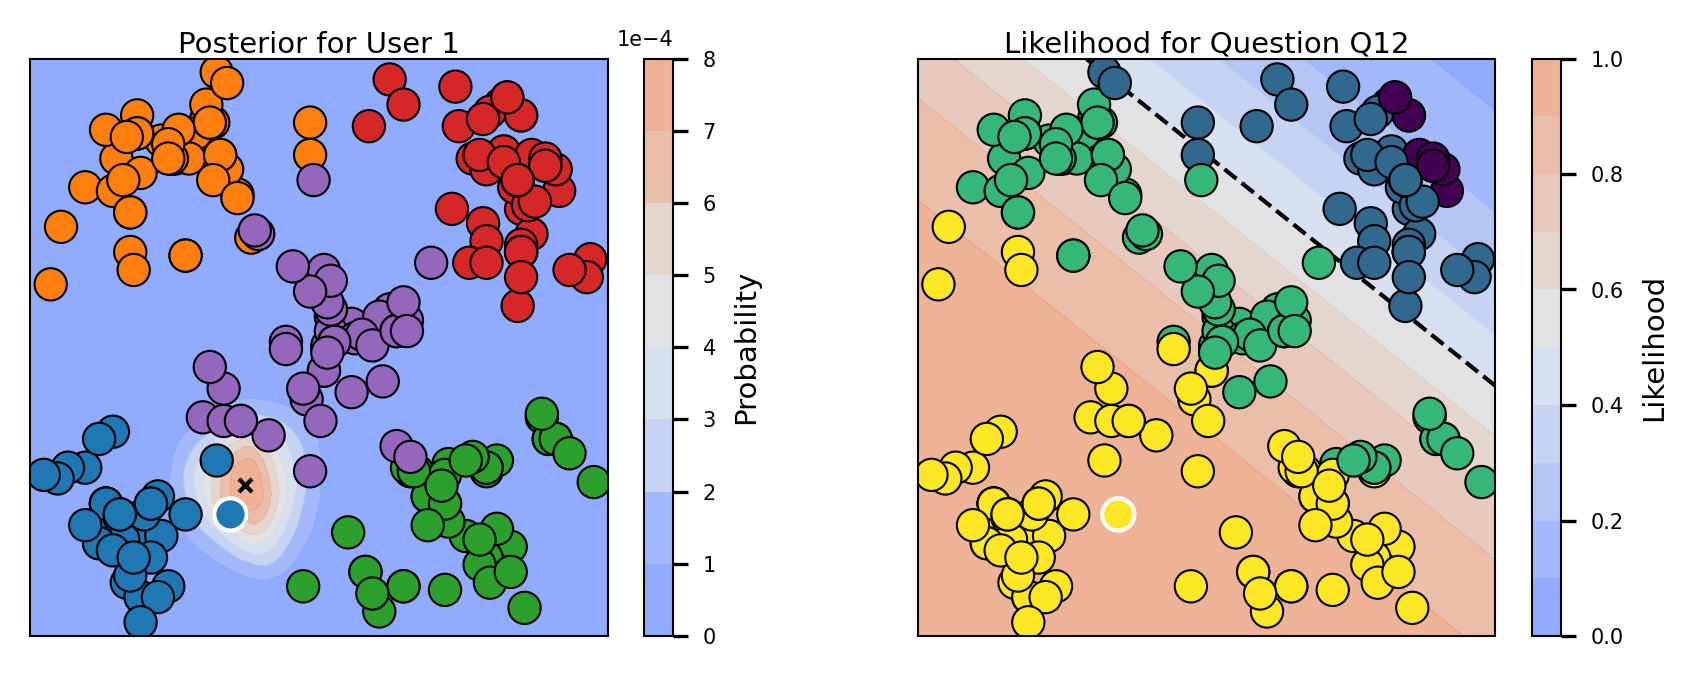

In [6]:
from ixplore.visualization import plot_overview

# Load user metadata (e.g., colors for plotting)
users = pd.read_csv('../data/synthetic_users.csv', index_col=0)

# Plot user embeddings
_ = plot_overview(model, question='Q12', user='1', colors=users.color, figsize=(7,2.5))